In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:
## train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트입니다.
## test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트입니다.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 여기서 사용되는 데이터셋은 
## 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이
## 레이블(label)은 0에서 9까지의 정수 배열 / 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다 
## class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 2s 0us/step


In [9]:
# 데이터셋에 클래스이름이 들어있지 않기 때문에 나중에 이미지 출력에 사용하기 위해 별도로 변수를 만듬 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# 데이터셋 구조 
# 60,000개의 이미지 & 각 이미지는 28*28 픽셀 

print(train_images.shape)

# 각 레이블은 0~9사이의 정수 
print(train_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


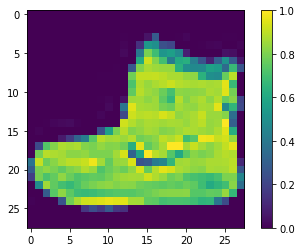

In [11]:
# train_image에 있는 첫번째 그림 
## 픽셀의 번위가 0~255라는 것 확인 가능 

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# 픽셀의 값을 조정한다 0~1 사이의 값으로 

train_images = train_images / 255.0

test_images = test_images / 255.0

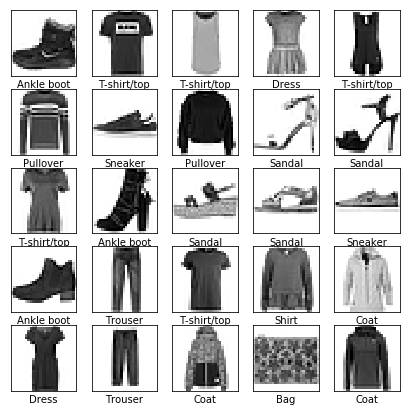

In [18]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cm = colormap 
    # cm.binary => 흑백 
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # 라벨에 맞춰서 클래스이름을 부여하고 출력하기 
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [ ]:
# 모델 구성 
# 1. 층설정
# 2. 모델 컴파일 
# 3. 모델 훈련
# 4. 정확도 평가 
# 5. 예측 만들기 

In [ ]:
# 1. 층 설정 

In [19]:
# 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일한다.
# 신경망의 기본 구성 요소는 layer이다. 
# layer는 주입된 데이터에서 표현을 추출한다. -> 문제 해결에 있어서 더 의미있는 표현 추출 

In [20]:
# tf.keras.layers.Flatten -> 2차원 배열의 이미지포맷을 28*28=784 픽셀의 1차원 배열로 변환한다. 
#                         -> 학습되는 가중치는 없고 데이터를 변환하기만 한다. 

# tf.keras.layers.Dense 층 = 집 연결(densely-connected) 층 = 완전 연결(fully-connected) 층
## 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다.
## 두 번째 (마지 막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다.
##                                                                   각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### relu 참고 : https://pythonkim.tistory.com/40
### softmax 참고 : https://m.blog.naver.com/wideeyed/221021710286
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# 2. 모델 컴파일 

In [22]:
# 손실 함수(Loss function) : 훈련 하는 동안 모델의 오차를 측정합니다. 
#                          : 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
#                          : 가중치를 설정하기 위한 값을 조정해 주는 함수 


# 옵티마이저(Optimizer) : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.


# 지표(Metrics) : 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 
#               : 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다

In [23]:
# cross entropy : 데이터 불확실성의 양 -> 누구나 다 알고있는 데이터는 쓸모없는  
# categorical_crossentropy : 비교할것이 2개 이상일때 사용 / 2개이면 binary 사용 
# sparse_categorical_crossentropy : 양이 많아지면 사용하기 좋음 그냥 categorical_crossentropy는 속도가 느릴수있음 

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 3. 모델 훈련 

In [36]:
# 훈련 데이터
print(train_labels)

model.fit(train_images, train_labels, epochs=5)

print(train_labels)

# 결과를 보면 모델이 훈련되면서 손실과 정확도 지표가 출력됨 
## 이모델은 훈련세트에서 약 0.84 (84%) 정도의 정확도를 달성했다.

## epoch=5 : 5번의 훈련이 진행됨 

[9 0 0 ... 3 0 5]
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4031 - acc: 0.8585
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3985 - acc: 0.8592
Epoch 3/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3948 - acc: 0.8604
Epoch 4/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3912 - acc: 0.8629
Epoch 5/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3878 - acc: 0.8637
[9 0 0 ... 3 0 5]


In [ ]:
# 4. 정확도 평가 

In [34]:
# test 데이터 셋 에서의 모델의 성능을 비교 

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)
print(test_labels)

# 테스트 세트의 정확도가 훈련 세트의 정확도 보다 낮음 
## 훈텬세트의 정확도와 테스트 세트의 정확도 사이의 차이는 overfitting 이기 때문 

# overfitting : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다. 

10000/10000 [==============================] - 1s 58us/sample - loss: 0.4655 - acc: 0.8333
테스트 정확도: 0.8333
[9 2 1 ... 8 1 5]


In [27]:
# 5. 예측 만들기 

In [42]:
# 훈련된 모델을 사용하여 이미지에 대한 예측을 만들기 
# 테스트 셋에 있는 각 이미지의 레이블을 예측했다. 

predictions = model.predict(test_images)

In [54]:
# 첫번째 예측 확인하기 
# 첫번째 이미지에 대해서 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.

predictions[0]

NameError: name 'predictions_array' is not defined

In [47]:
np.argmax(predictions[0])

# 가장 높은 신뢰도를 가진 레이블 -> 9가 나옴 
# test_label 을 확인하여서 첫번째 test_label이 9라면 잘 예측한것이 된다. 

9

In [48]:
# 위에서 예상한것과 같이 첫번째 레이블이 9가 나왔음을 확인 

test_labels[0]

9

In [49]:
# 10개의 신뢰도를 모두 그래프로 표현하기 

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # prediction 배열에서 가장높은 신뢰도를 가진 레이블과 실제 레이블을 비교해본다. 
  # 일치하면 파란색으로 틀리면 빨간색으로 라벨을 표시한다. 
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  # 예측 신뢰도와 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

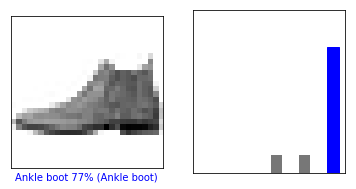

In [50]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인 

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

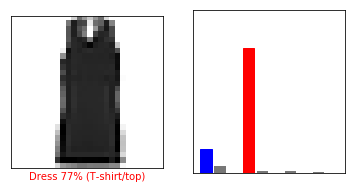

In [53]:
# 890번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인 

i = 890
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

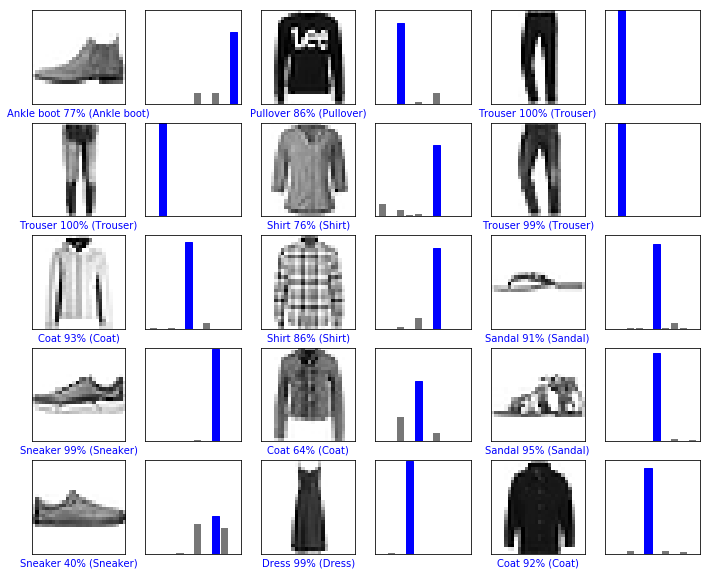

In [55]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [56]:
# 훈련된 모델을 사용해서 한 이미지에 대한 예측을 만든다. 

# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [57]:
# tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [58]:
# 해당 이미지에 대한 예측을 만듬 

predictions_single = model.predict(img)

print(predictions_single)

[[8.72234409e-07 1.93176781e-08 6.50695847e-06 5.30582838e-06
  5.71972714e-06 1.11612678e-01 2.03712516e-05 1.12544805e-01
  4.44483617e-03 7.71358848e-01]]


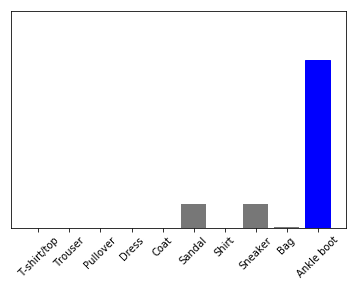

In [59]:
# model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [60]:
# model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
